In [1]:
#pip install geopandas

     |████████████████████████████████| 994 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 181 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
# set the filepath and load in a shapefile
fp = 'vic_lga_polygon_shp/VIC_LGA_POLYGON_SHP.shp'
map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head(100)

<AxesSubplot:>

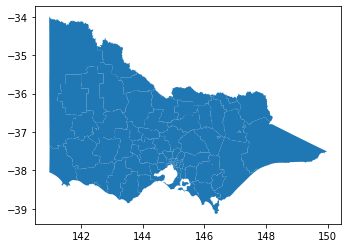

In [14]:
map_df.plot()

In [15]:
df = pd.read_csv("vic-security-score.csv", header=0)
df['lga_name'] = df['lga_name'].str.upper()
# df.head(100)

In [16]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ABB_NAME').join(df.set_index('lga_name'))
# merged.head(100)

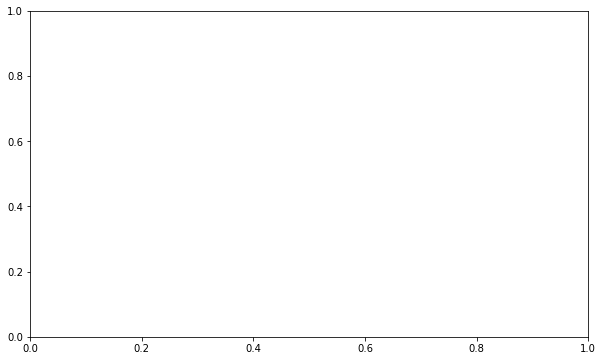

In [17]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'overall score'
# set the range for the choropleth
vmin, vmax = -5, 5
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10,6))

In [18]:
# create map
chronopleth = merged.plot(column=variable, cmap='Blues', linewidth=0.5, ax=ax, edgecolor='0.8')
chronopleth.set_title('The Chronopleth Map of All LGAs in VIC')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

ax.axis('off')
plt.show()

<Figure size 432x288 with 0 Axes>

In [19]:
fig.savefig('chronopleth_map_export.png')